In [1]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [2]:
import fonctions as f

***Modélisation par série temporelle***

In [3]:
# 1. Charger les données
df = f.pd.read_csv("base.csv")
df.head()

,DATE,RR,TN,HTN,TX,HTX,TM,TMNX,DG,TAMPLI,...,HUN,UX,HUX,DHUMI40,DHUMI80,TSVM,UM,ETPGRILLE,NEIGETOTX,NEIGETOT06
0,2022-01-05,2.6,-0.4,1759.0,3.4,1217.0,0.9,1.50,389.0,3.8,...,1244.0,99.0,329.0,0.0,1157.0,5.7,88.0,0.4,0.0,0.0
1,2022-01-06,0.0,-2.5,1746.0,4.3,1327.0,-0.6,0.90,964.0,6.8,...,1032.0,99.0,2304.0,0.0,1043.0,5.1,88.0,0.6,0.0,0.0
2,2022-01-07,10.0,-6.9,718.0,1.6,2229.0,-1.2,-2.65,674.0,8.5,...,708.0,99.0,126.0,0.0,1440.0,5.4,96.0,0.0,0.0,0.0
3,2022-01-08,13.2,-0.7,733.0,6.3,2319.0,2.4,2.80,87.0,7.0,...,1403.0,99.0,618.0,0.0,1231.0,6.4,89.0,0.5,0.0,0.0
4,2022-01-09,7.6,0.4,737.0,2.2,601.0,1.8,1.30,0.0,1.8,...,3.0,98.0,745.0,0.0,1440.0,6.5,94.0,0.1,0.0,0.0


In [54]:
#Création de la variable "event":

# Définir les seuils arbitraires!
seuil_chaleur = 40  
seuil_froid = -5  
seuil_inondation = 50
seuil_tempete = 30


# Créer une variable "event"
df["event"] = ((df["TX"] > seuil_chaleur) | 
                        (df["TN"] < seuil_froid) |
                        (df["RR"] > seuil_inondation) |
                        (df["FXI"] > seuil_tempete)).astype(int)

# Afficher le DataFrame
df.head()

,RR,TN,HTN,TX,HTX,TM,TMNX,DG,TAMPLI,TNTXM,...,HUX,DHUMI40,DHUMI80,TSVM,UM,ETPGRILLE,NEIGETOTX,NEIGETOT06,DATE,event
0,2.6,-0.4,1759.0,3.4,1217.0,0.9,1.50,389.0,3.8,1.5,...,329.0,0.0,1157.0,5.7,88.0,0.4,0.0,0.0,20220105.0,0
1,0.0,-2.5,1746.0,4.3,1327.0,-0.6,0.90,964.0,6.8,0.9,...,2304.0,0.0,1043.0,5.1,88.0,0.6,0.0,0.0,20220106.0,0
2,10.0,-6.9,718.0,1.6,2229.0,-1.2,-2.65,674.0,8.5,-2.7,...,126.0,0.0,1440.0,5.4,96.0,0.0,0.0,0.0,20220107.0,1
3,13.2,-0.7,733.0,6.3,2319.0,2.4,2.80,87.0,7.0,2.8,...,618.0,0.0,1231.0,6.4,89.0,0.5,0.0,0.0,20220108.0,0
4,7.6,0.4,737.0,2.2,601.0,1.8,1.30,0.0,1.8,1.3,...,745.0,0.0,1440.0,6.5,94.0,0.1,0.0,0.0,20220109.0,0


Choisir les variables cibles en fonction de leurs correlations avec la variable cible "Température Moyenne".

In [30]:
# Sélectionner les colonnes pertinentes pour la prédiction de TM (Température Moyenne)
variables_utiles = [ "ETPGRILLE", "TSVM", "TNTXM", "TMNX",  "TN", "TX"]
cible = "TM"  # Variable cible : Température Moyenne

In [32]:
# Garder uniquement les colonnes utiles + la cible
df_mod = df[variables_utiles + [cible]]

In [33]:
# 3. Diviser les données en ensembles d'entraînement et de test
X = df_mod[variables_utiles]  # Variables explicatives
y = df_mod[cible]  # Variable cible

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# 4. Entraîner un modèle de prédiction (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
# 5. Faire des prédictions
y_pred = model.predict(X_test)

In [38]:
# 6. Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE) : {mse:.2f}")
print(f"R² Score : {r2:.2f}")


Mean Squared Error (MSE) : 0.82
R² Score : 0.98


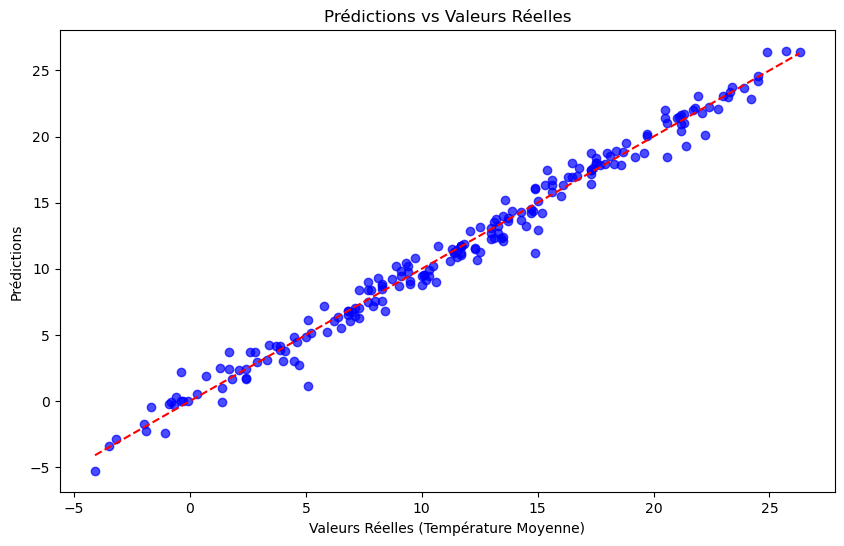

In [39]:
# 7. Visualiser les résultats
f.plt.figure(figsize=(10, 6))
f.plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
f.plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color="red")
f.plt.title("Prédictions vs Valeurs Réelles")
f.plt.xlabel("Valeurs Réelles (Température Moyenne)")
f.plt.ylabel("Prédictions")
f.plt.show()

In [40]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [41]:
# Convertir la colonne DATE en type datetime et définir comme index
df["DATE"] = pd.to_datetime(df["DATE"])
df.set_index("DATE", inplace=True)

In [42]:
# Garder uniquement la colonne cible TM
data = df["TM"]

In [43]:
# 2. Vérifier la stationnarité
result = adfuller(data)
print(f"Statistique de test ADF : {result[0]}")
print(f"p-value : {result[1]}")

if result[1] > 0.05:
    print("La série n'est pas stationnaire. Appliquer une différenciation.")
    data_diff = data.diff().dropna()  # Appliquer une différenciation
else:
    print("La série est stationnaire.")
    data_diff = data

Statistique de test ADF : -3.525958069197169
p-value : 0.007344931921113173
La série est stationnaire.


On a:
p-value<1%:
Les résultats statistiques ne nous permettre pas d'accepter l'hypothèse nulle selon laquelle TM n'est pas stationnaire au seuil de 1%. On rejette l'hypothèse nulle de non-stationnarité de TM.

In [44]:
# 3. Diviser la série en données d'entraînement et de test
train_size = int(len(data_diff) * 0.8)
train, test = data_diff[:train_size], data_diff[train_size:]

In [45]:
# 4. Ajuster un modèle SARIMA
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit(disp=False)
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                 TM   No. Observations:                  817
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1909.149
Date:                            Sun, 22 Dec 2024   AIC                           3828.297
Time:                                    06:42:12   BIC                           3851.745
Sample:                                         0   HQIC                          3837.303
                                            - 817                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7077      0.046     15.391      0.000       0.618       0.798
ma.L1         -0.9061      0.028   

In [46]:
# 5. Faire des prédictions
forecast = sarima_fit.get_forecast(steps=len(test))
forecast_index = test.index
forecast_values = forecast.predicted_mean

In [47]:
# 6. Évaluation du modèle
mse = mean_squared_error(test, forecast_values)
print(f"Mean Squared Error (MSE) : {mse:.2f}")

Mean Squared Error (MSE) : 28.80


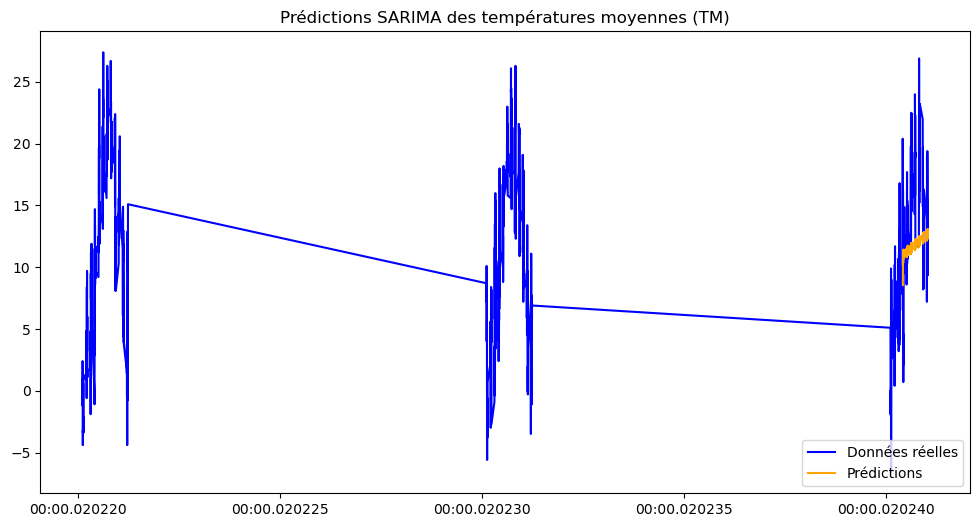

In [48]:
# 7. Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(data_diff, label="Données réelles", color="blue")
plt.plot(forecast_index, forecast_values, label="Prédictions", color="orange")
plt.title("Prédictions SARIMA des températures moyennes (TM)")
plt.legend()
plt.show()

In [14]:
# Exemple de données (vous pouvez remplacer par vos propres données)

data = {
    'date': pd.to_datetime(df["DATE"]),
    'value': df["TM"]
}

# Conversion en DataFrame
df_p = pd.DataFrame(data)
df_p.head()

,date,value
0,1970-01-01 00:00:00.020220105,0.9
1,1970-01-01 00:00:00.020220106,-0.6
2,1970-01-01 00:00:00.020220107,-1.2
3,1970-01-01 00:00:00.020220108,2.4
4,1970-01-01 00:00:00.020220109,1.8


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemple de données (vous pouvez remplacer par vos propres données)

data = {
    'date': pd.to_datetime(df["DATE"]),
    'value': df["TM"]
}

# Conversion en DataFrame
df_p = pd.DataFrame(data)

# Définir la colonne 'date' comme index
df_p.set_index('date', inplace=True)

# Filtrage des données pour la plage de dates spécifiée
start_date = '2022-01-01'
end_date = '2022-12-31'
filtered_df = df_p[(df_p['date'] >= start_date) & (df_p['date'] <= end_date)]

# Visualisation des données filtrées
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['date'], filtered_df['température_moyenne'], marker='o', linestyle='-', color='blue', label='Température moyenne')
plt.title("Températures Moyennes en 2022", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Température Moyenne (°C)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


KeyError: 'date'

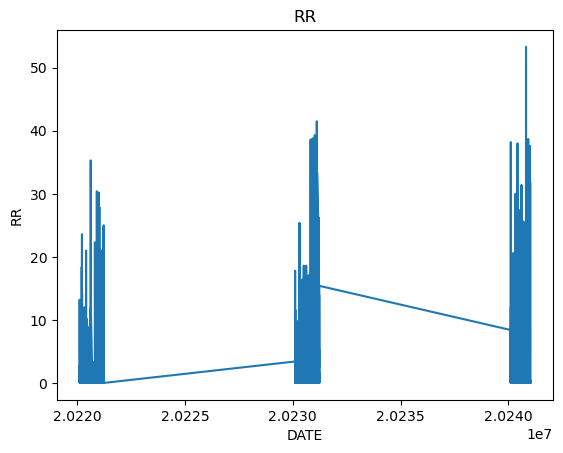

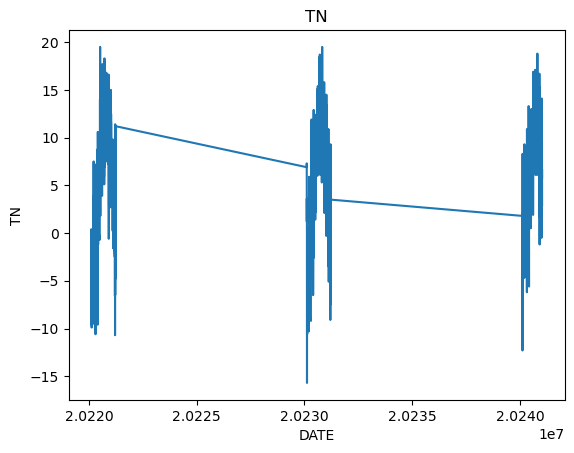

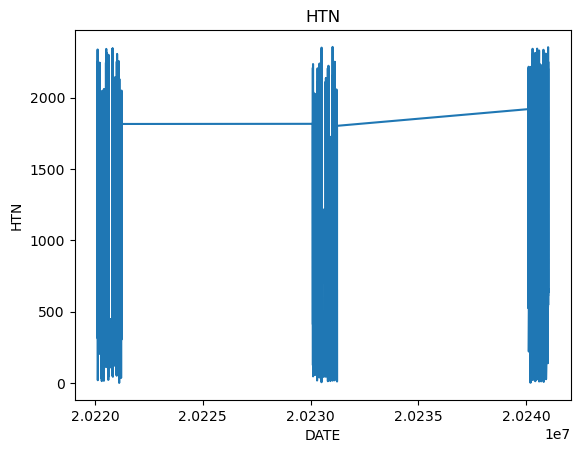

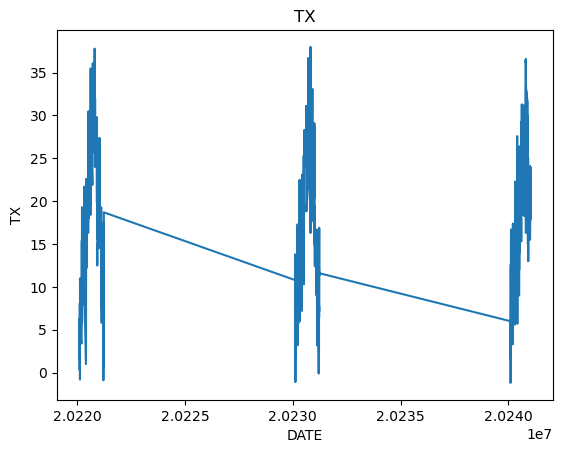

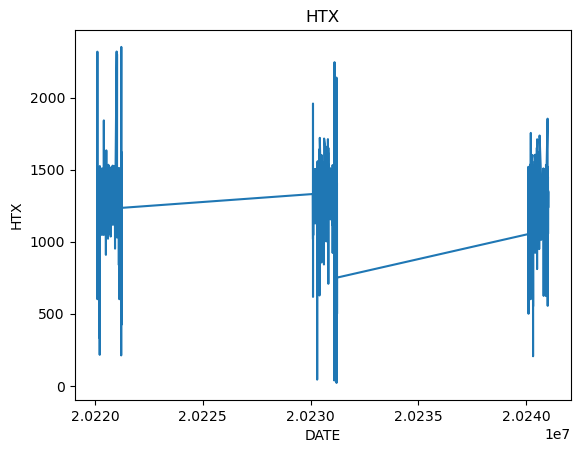

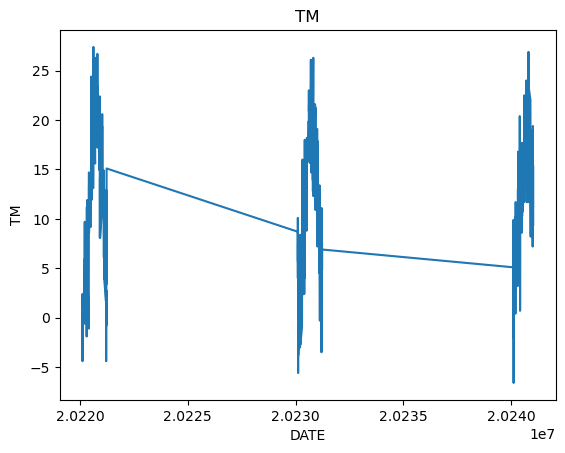

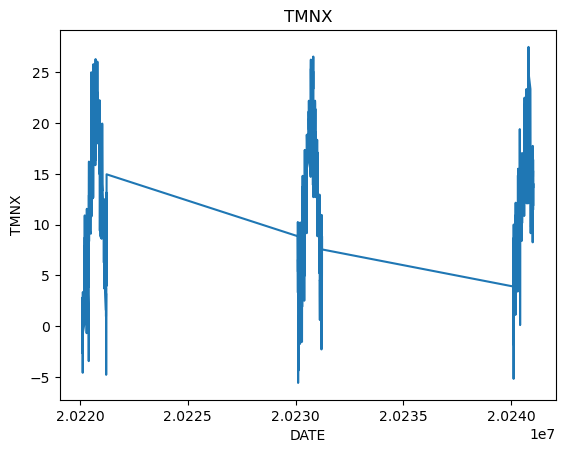

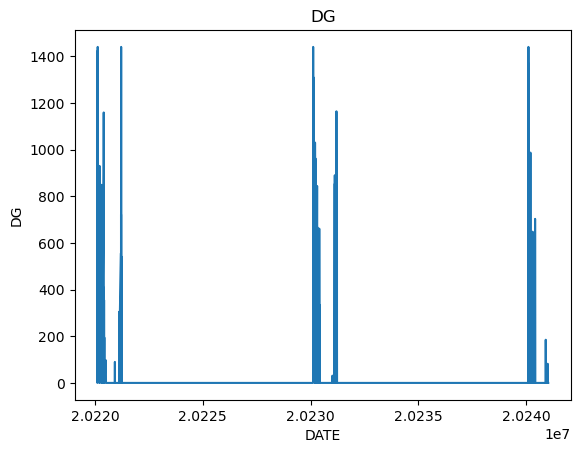

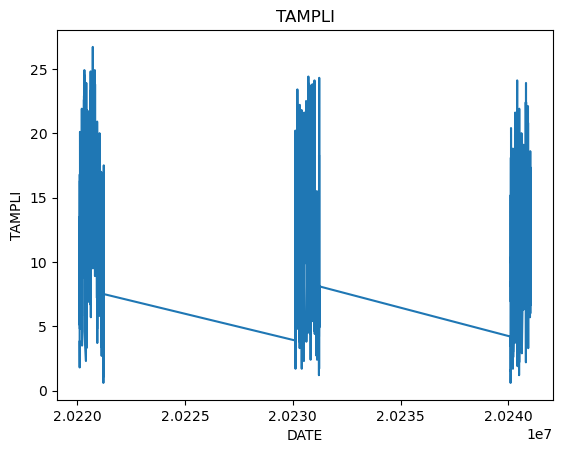

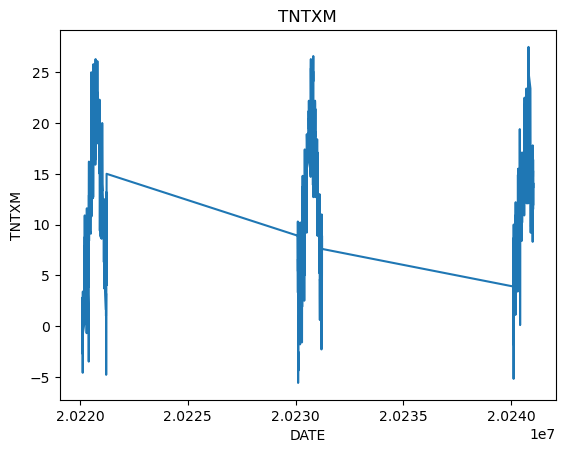

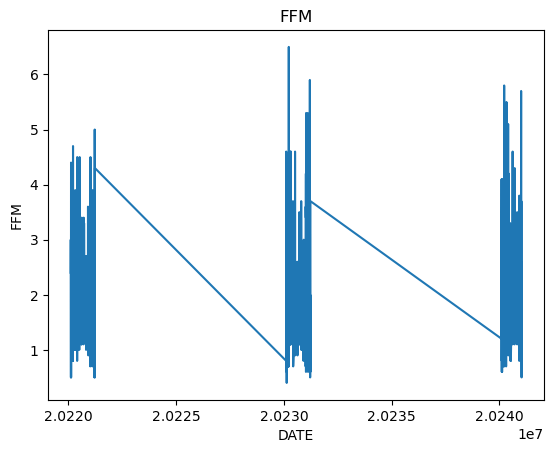

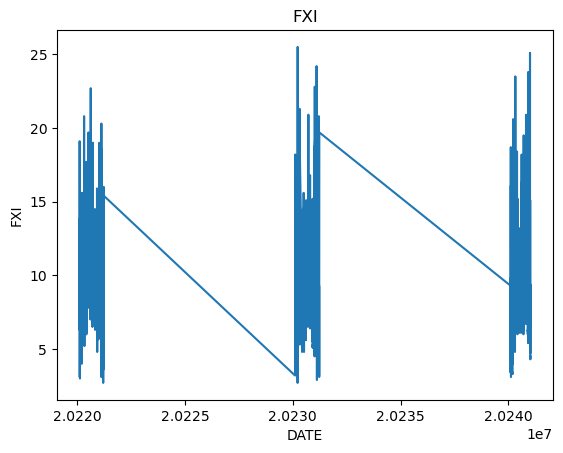

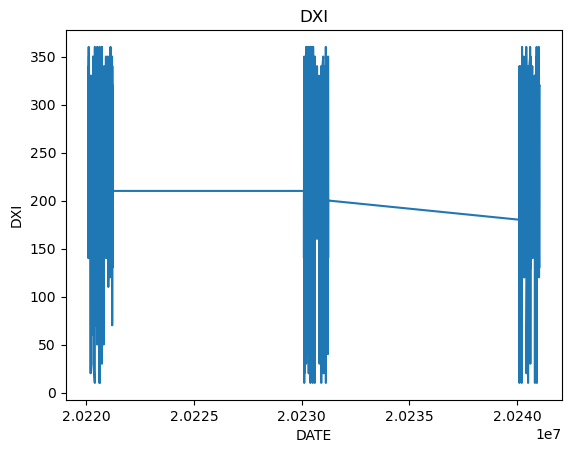

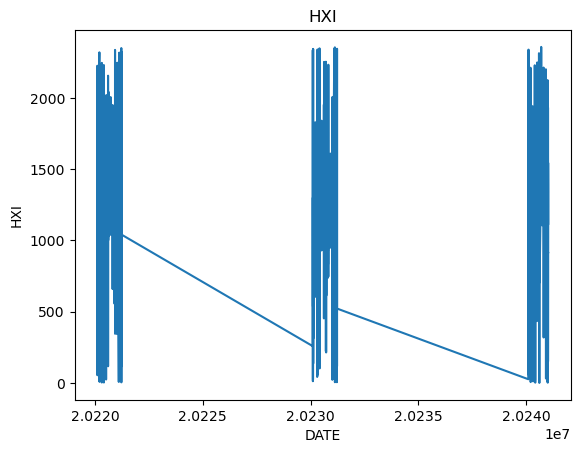

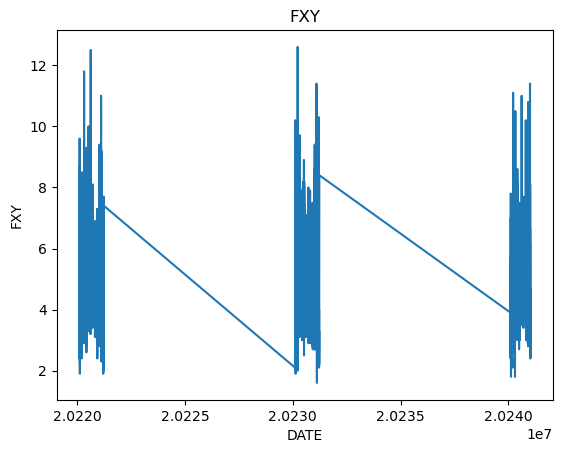

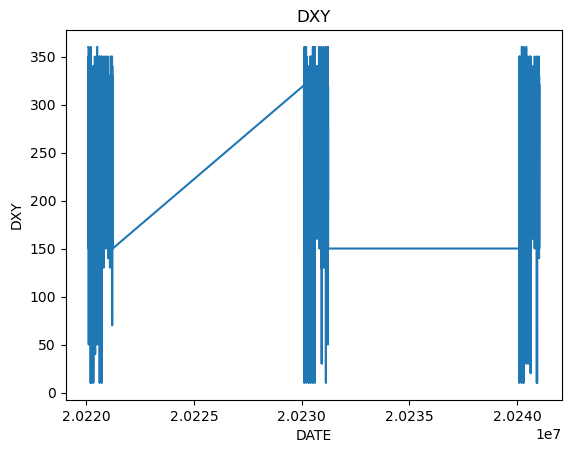

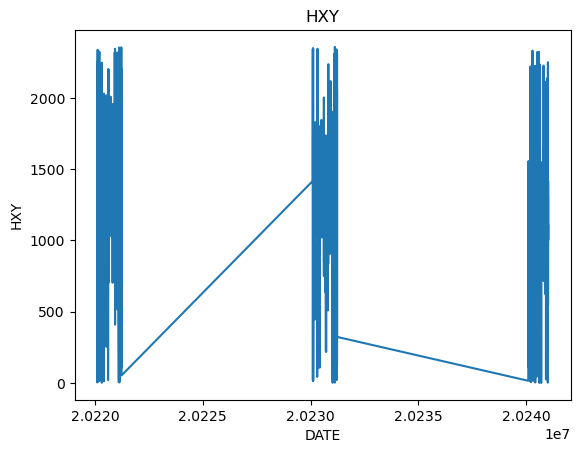

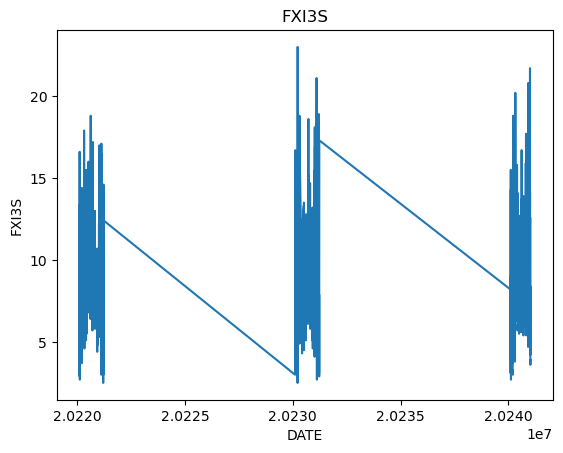

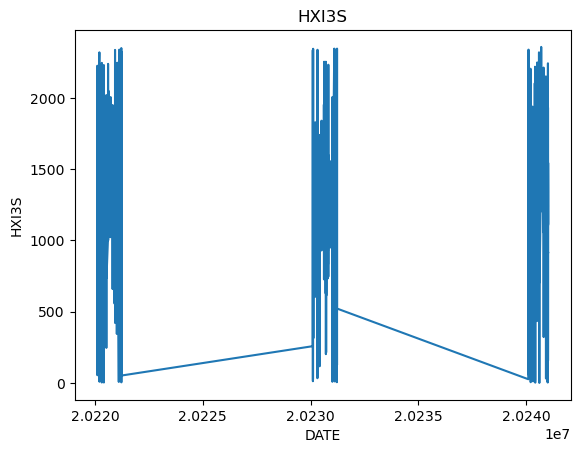

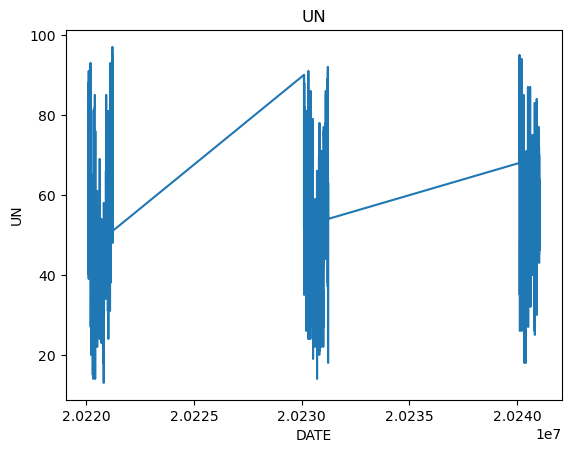

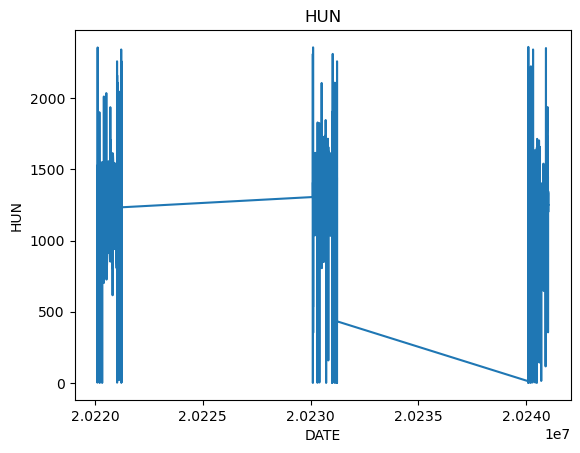

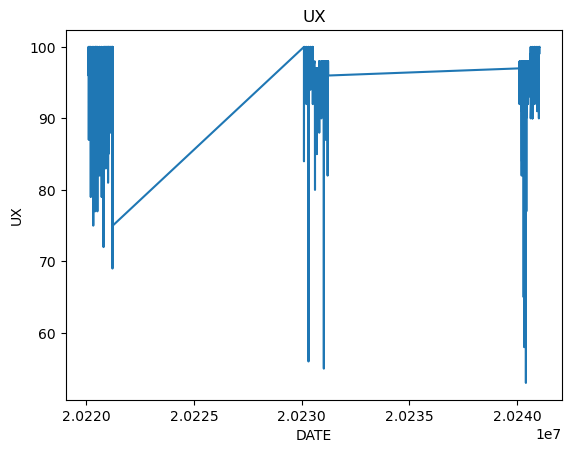

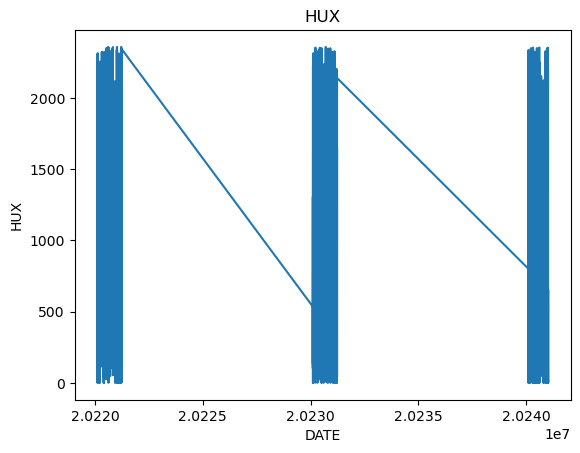

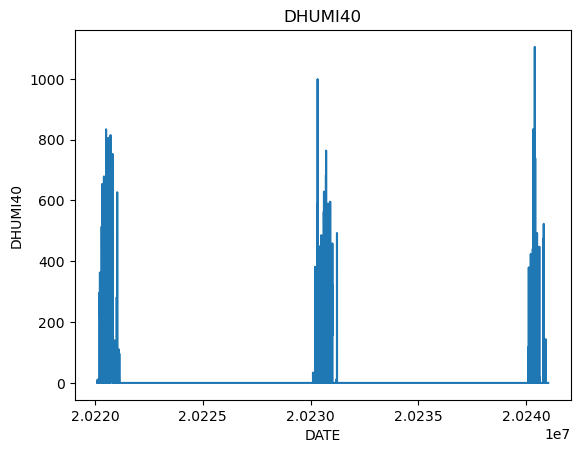

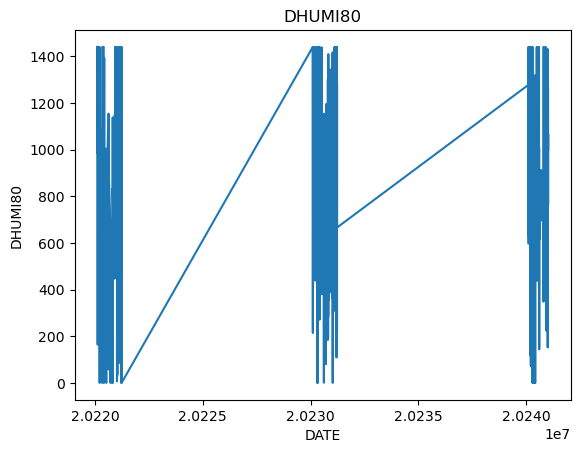

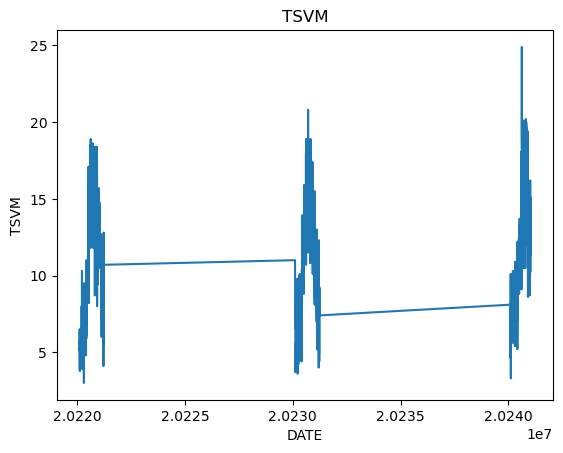

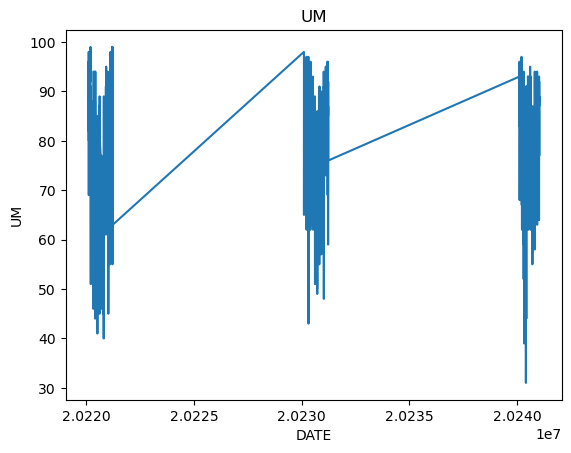

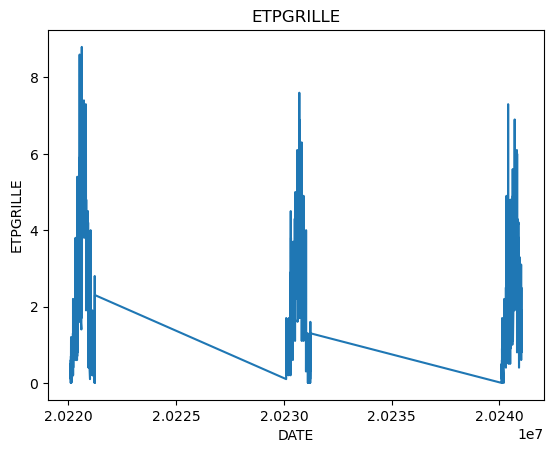

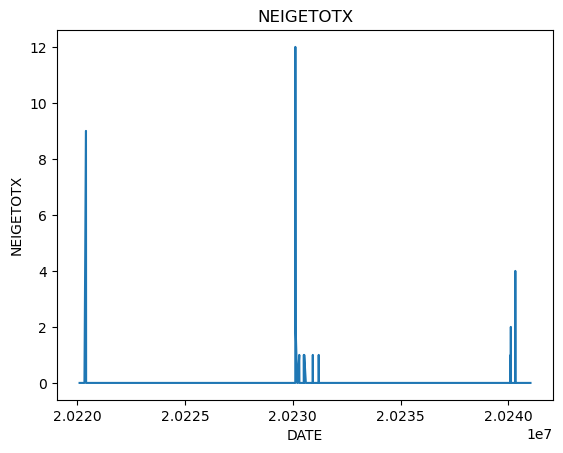

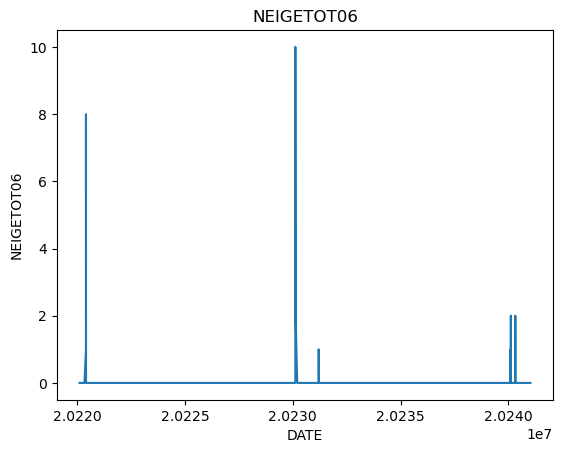

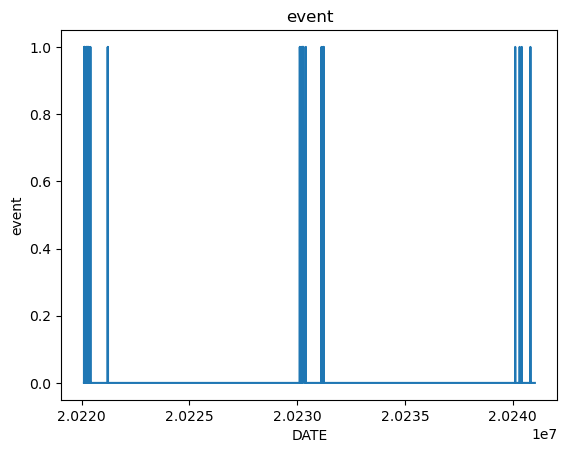

In [55]:
# Visualizing the behavior of all columns
columns = df.drop(columns=['DATE']).columns
for column in columns:
    f.sns.lineplot(x=df['DATE'], y=df[column])
    f.plt.title(column)
    f.plt.show()

In [81]:
# 1. Charger les données
df = f.pd.read_csv("data.csv")
df.head()

,POSTE,DATE,RR,DRR,TN,HTN,TX,HTX,TM,TMNX,...,BRUME,ECLAIR,ETPMON,ETPGRILLE,UV,TMERMAX,TMERMIN,HNEIGEF,NEIGETOTX,NEIGETOT06
0,1014002,20220105,"2,6",NaN,"-0,4",1759.0,"3,4",1217.0,"0,9","1,50",...,NaN,NaN,NaN,"0,4",NaN,NaN,NaN,NaN,0.0,0.0
1,1014002,20220106,"0,0",NaN,"-2,5",1746.0,"4,3",1327.0,"-0,6","0,90",...,NaN,NaN,NaN,"0,6",NaN,NaN,NaN,NaN,0.0,0.0
2,1014002,20220107,"10,0",NaN,"-6,9",718.0,"1,6",2229.0,"-1,2","-2,65",...,NaN,NaN,NaN,"0,0",NaN,NaN,NaN,NaN,0.0,NaN
3,1014002,20220108,"13,2",NaN,"-0,7",733.0,"6,3",2319.0,"2,4","2,80",...,NaN,NaN,NaN,"0,5",NaN,NaN,NaN,NaN,0.0,0.0
4,1014002,20220109,"7,6",NaN,"0,4",737.0,"2,2",601.0,"1,8","1,30",...,NaN,NaN,NaN,"0,1",NaN,NaN,NaN,NaN,0.0,0.0


In [82]:

# Vérification
print(df.dtypes)

POSTE           int64
DATE            int64
RR             object
DRR           float64
TN             object
               ...   
TMERMAX       float64
TMERMIN       float64
HNEIGEF       float64
NEIGETOTX     float64
NEIGETOT06    float64
Length: 69, dtype: object


In [86]:
# Filtrer les données pour une seule année (par exemple, 2022)
start_date = 20220105
end_date = 20221231
filtered_df = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]

filtered_df.head()

,POSTE,DATE,RR,DRR,TN,HTN,TX,HTX,TM,TMNX,...,BRUME,ECLAIR,ETPMON,ETPGRILLE,UV,TMERMAX,TMERMIN,HNEIGEF,NEIGETOTX,NEIGETOT06
0,1014002,20220105,"2,6",NaN,"-0,4",1759.0,"3,4",1217.0,"0,9","1,50",...,NaN,NaN,NaN,"0,4",NaN,NaN,NaN,NaN,0.0,0.0
1,1014002,20220106,"0,0",NaN,"-2,5",1746.0,"4,3",1327.0,"-0,6","0,90",...,NaN,NaN,NaN,"0,6",NaN,NaN,NaN,NaN,0.0,0.0
2,1014002,20220107,"10,0",NaN,"-6,9",718.0,"1,6",2229.0,"-1,2","-2,65",...,NaN,NaN,NaN,"0,0",NaN,NaN,NaN,NaN,0.0,NaN
3,1014002,20220108,"13,2",NaN,"-0,7",733.0,"6,3",2319.0,"2,4","2,80",...,NaN,NaN,NaN,"0,5",NaN,NaN,NaN,NaN,0.0,0.0
4,1014002,20220109,"7,6",NaN,"0,4",737.0,"2,2",601.0,"1,8","1,30",...,NaN,NaN,NaN,"0,1",NaN,NaN,NaN,NaN,0.0,0.0


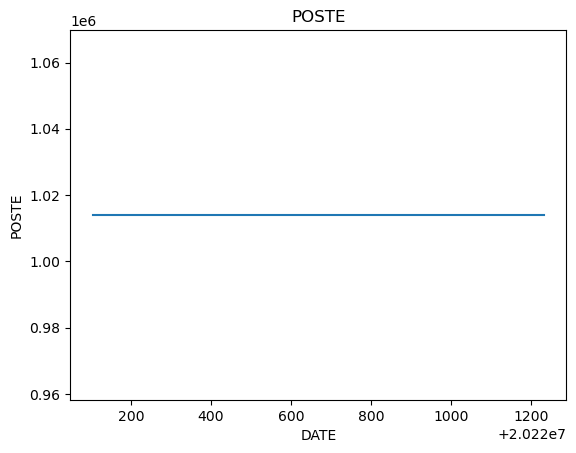

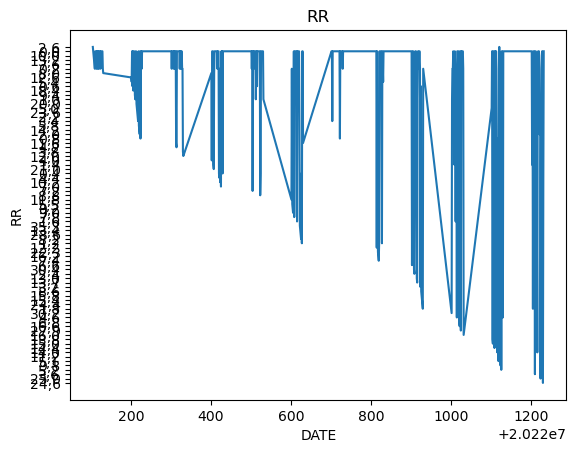

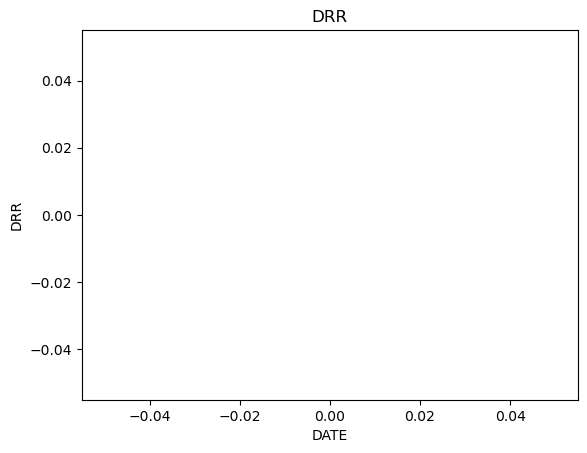

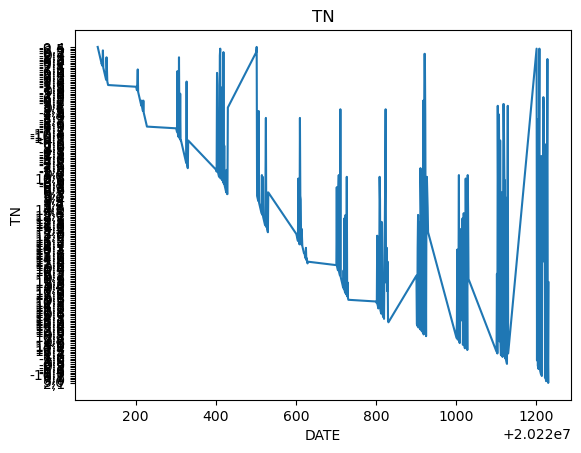

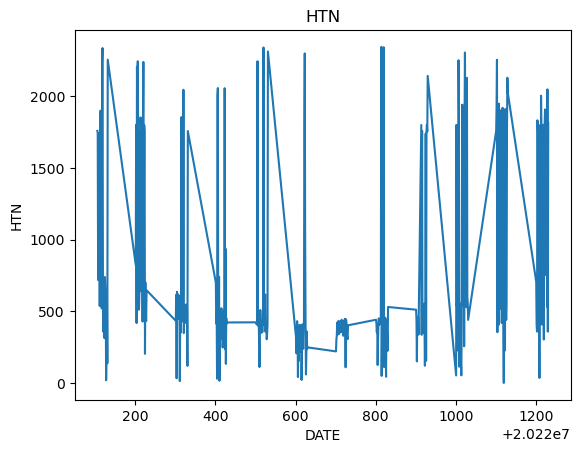

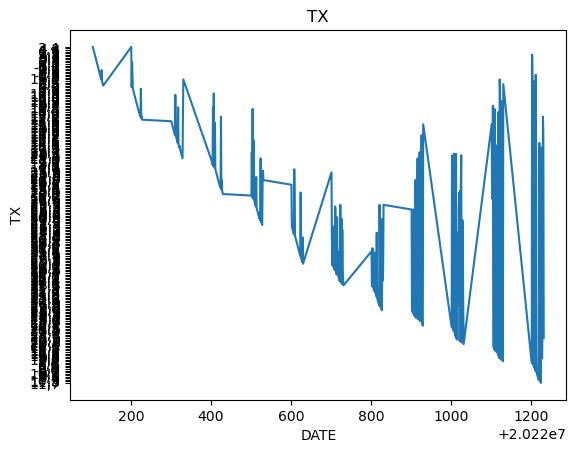

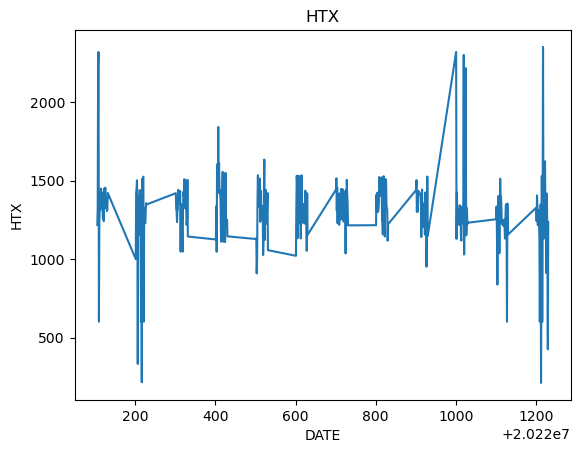

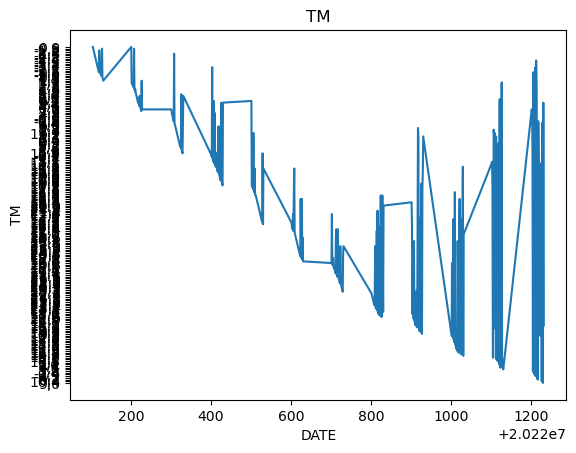

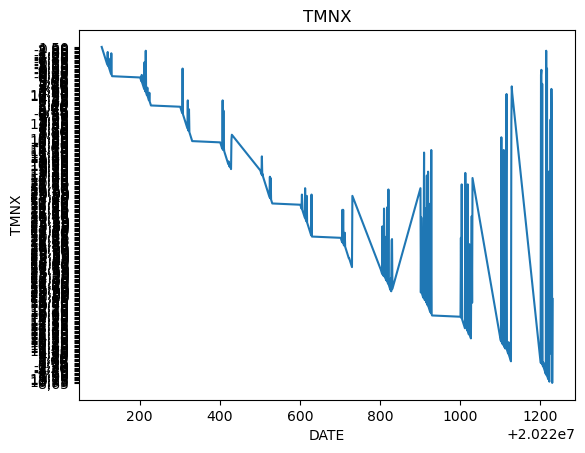

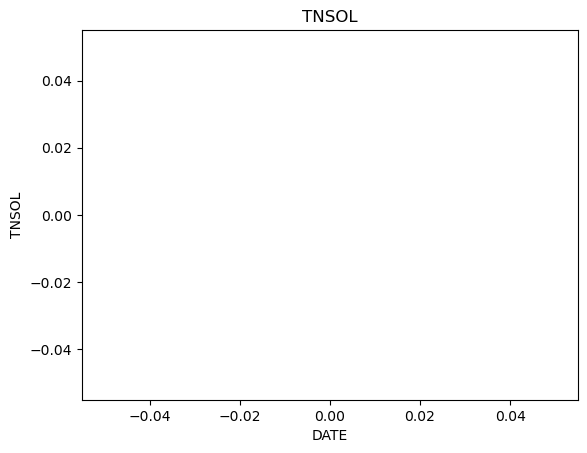

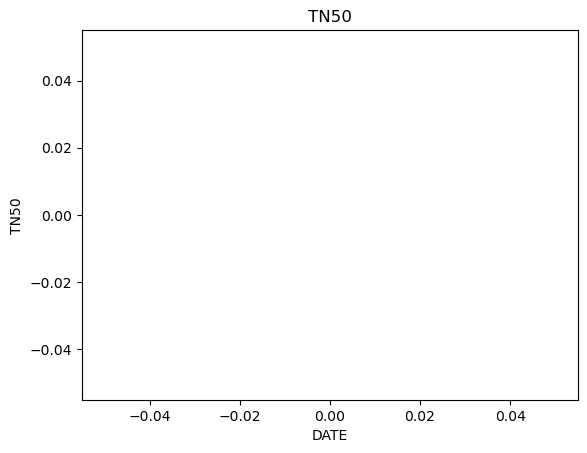

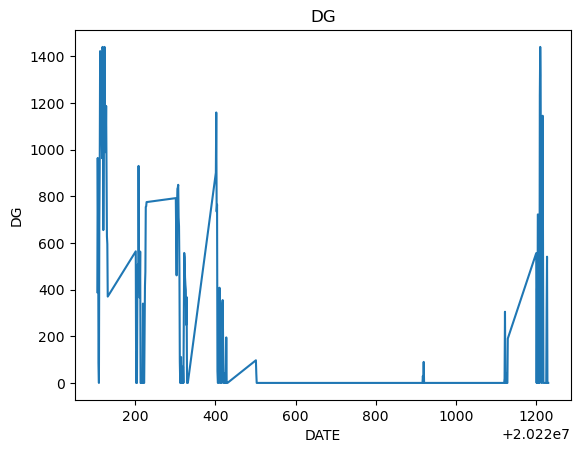

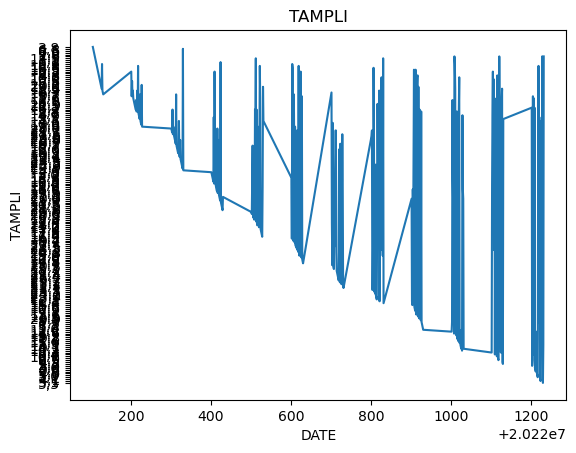

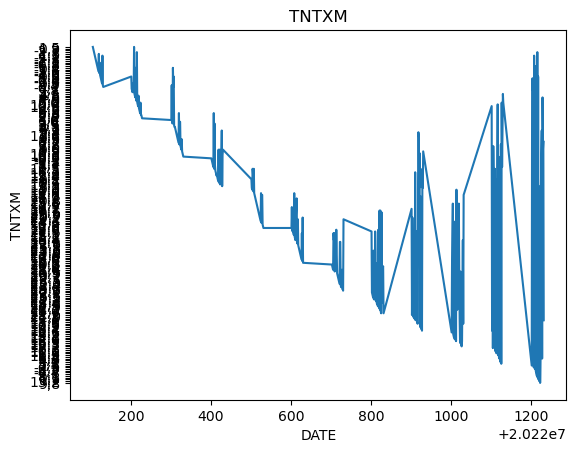

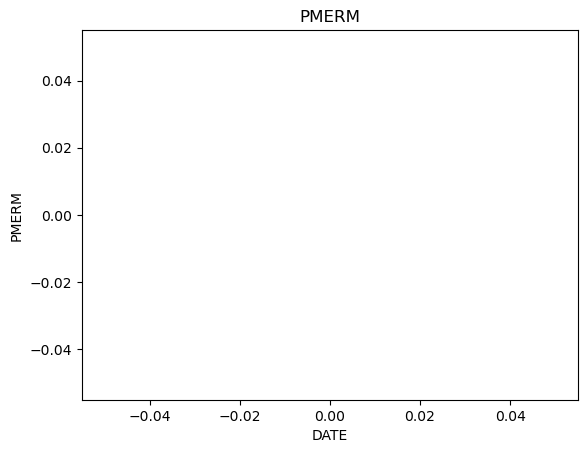

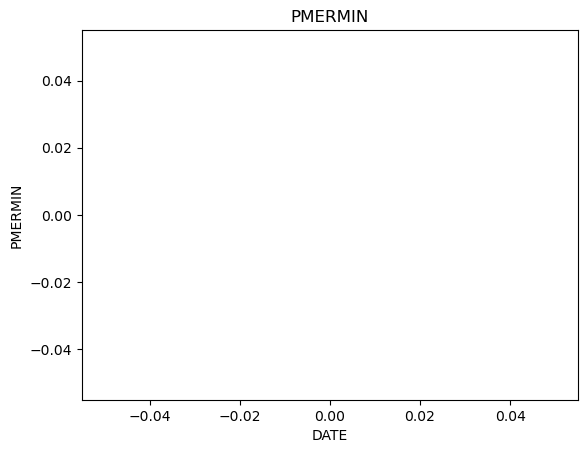

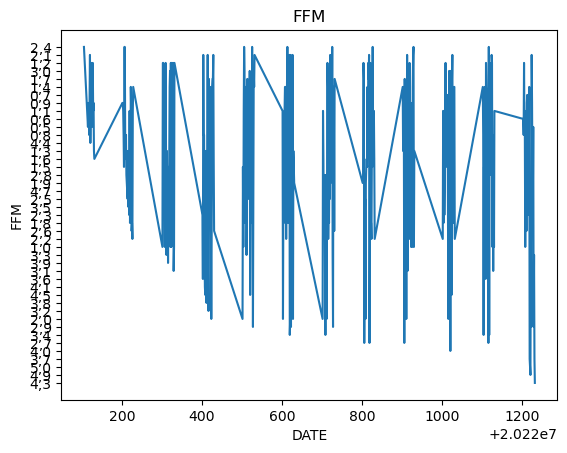

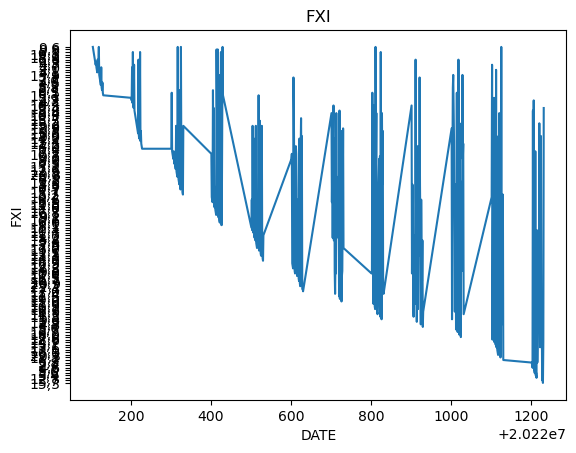

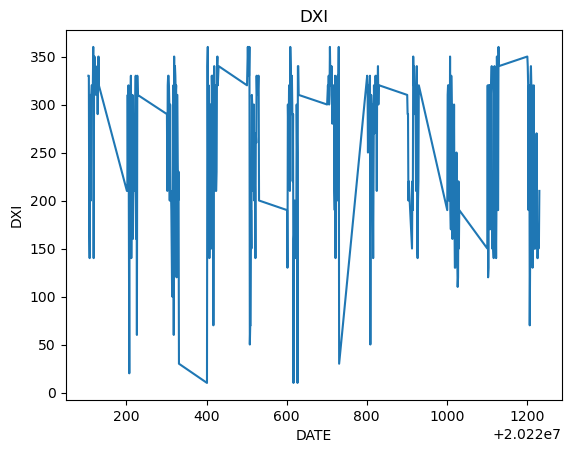

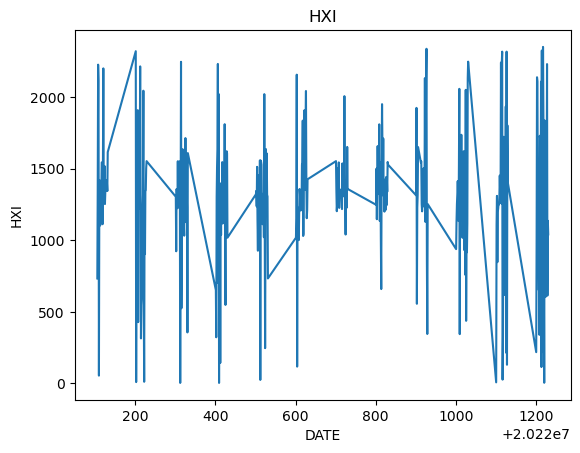

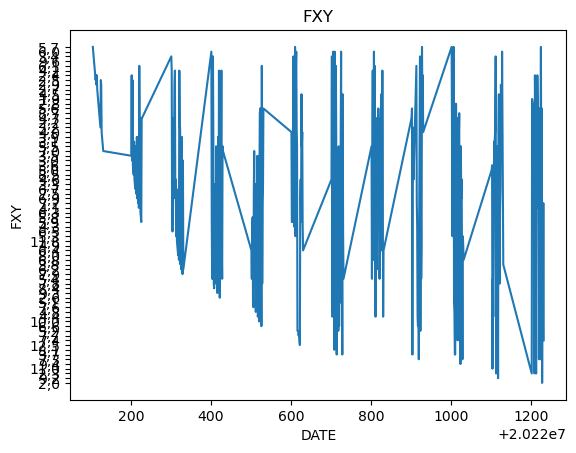

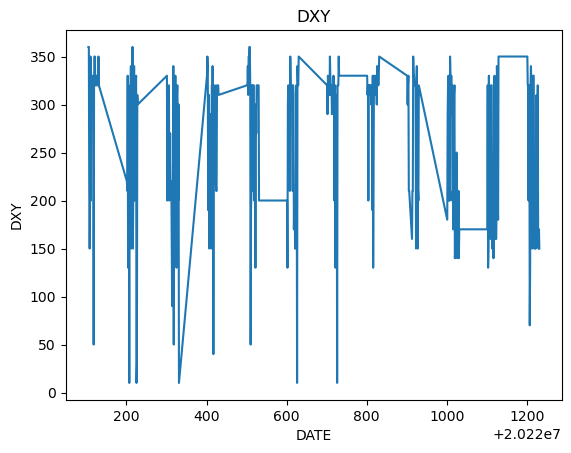

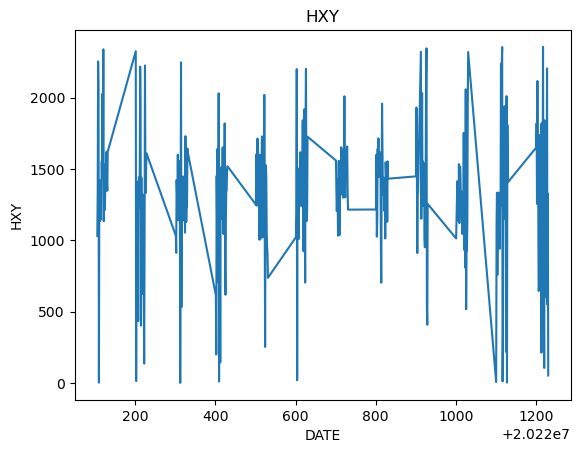

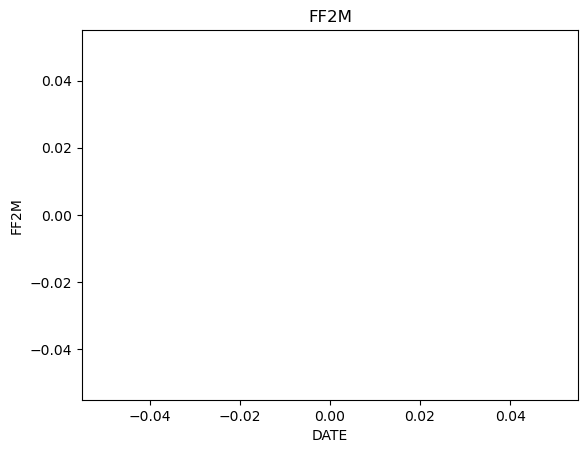

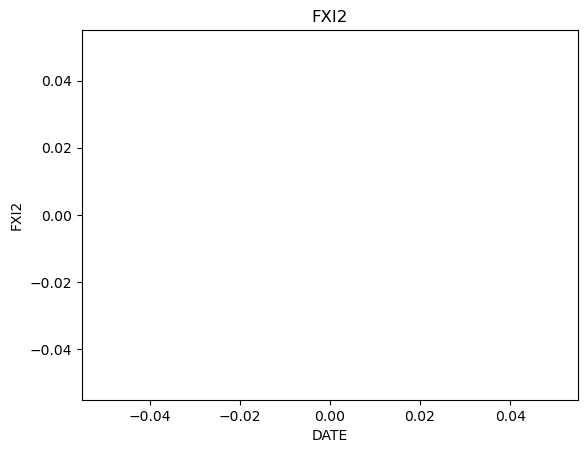

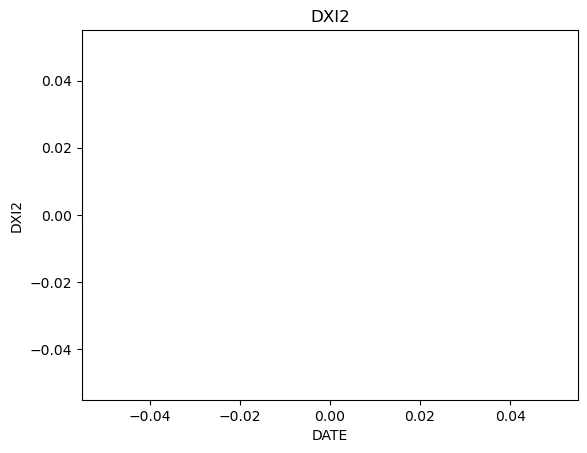

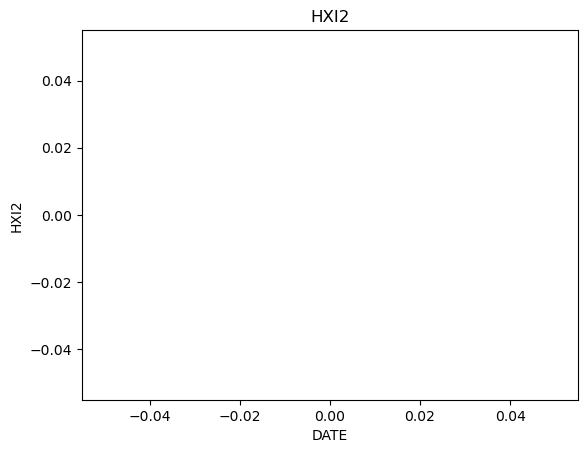

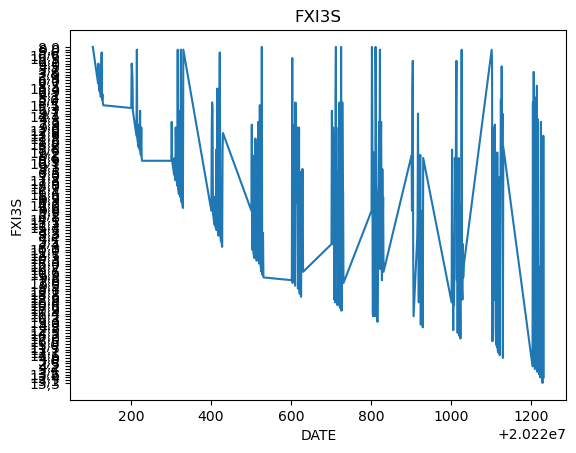

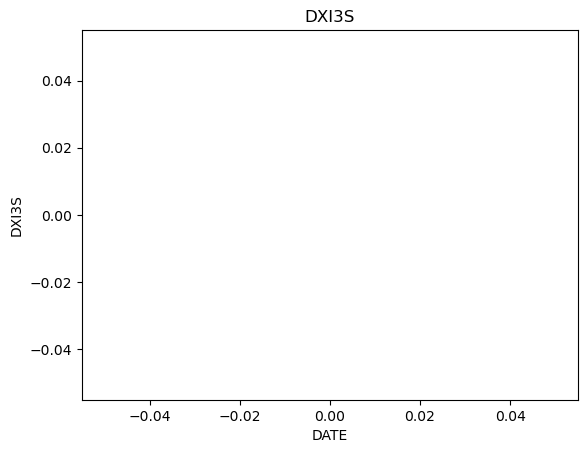

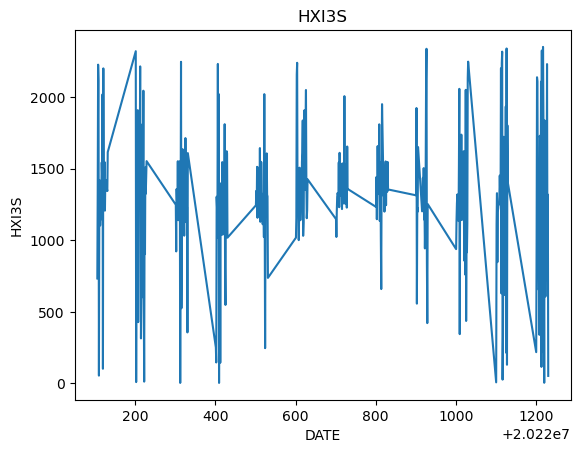

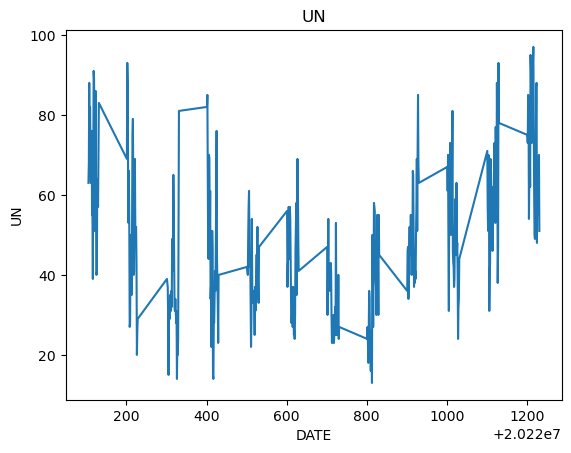

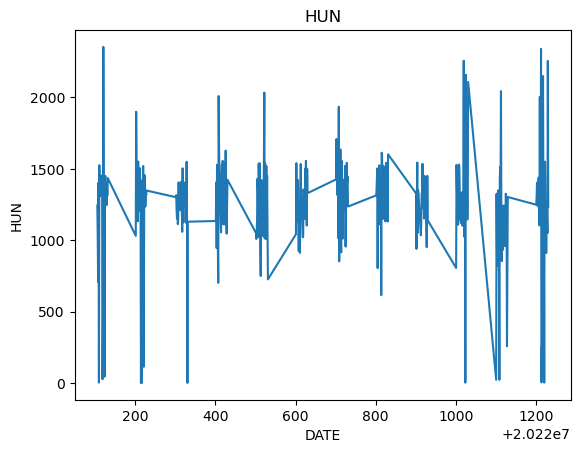

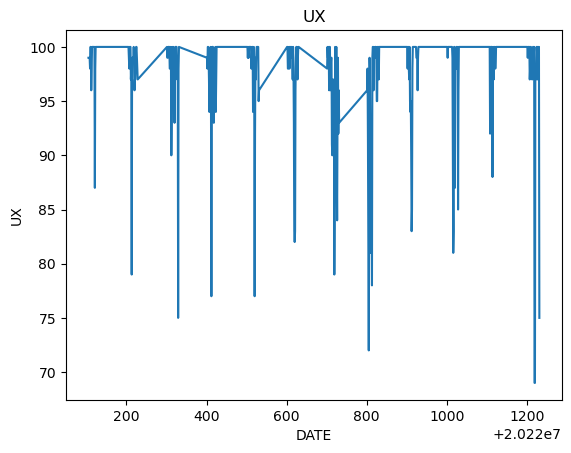

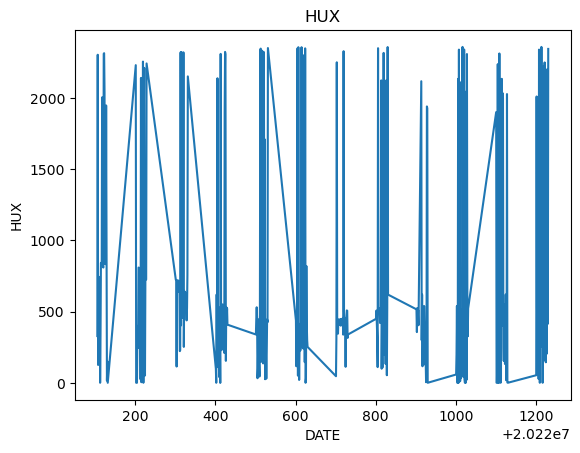

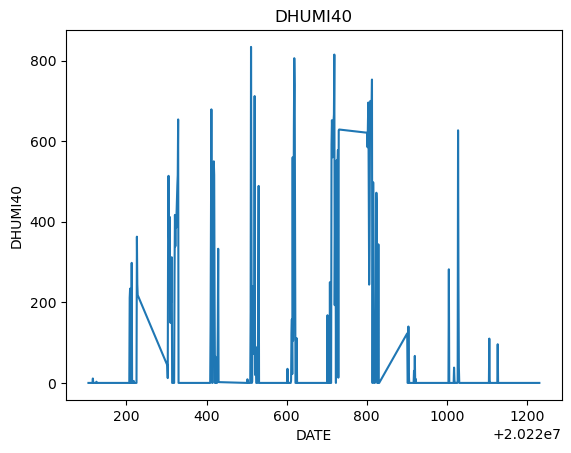

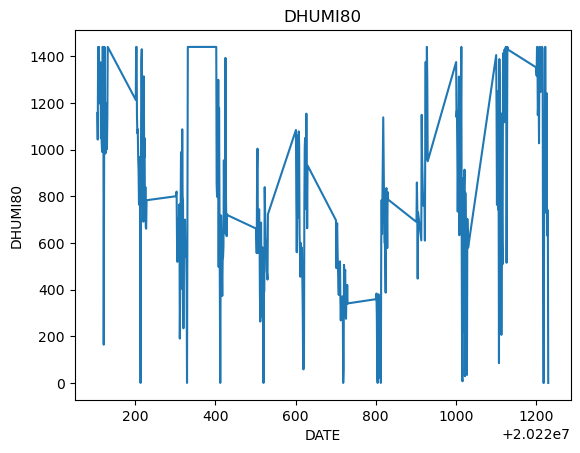

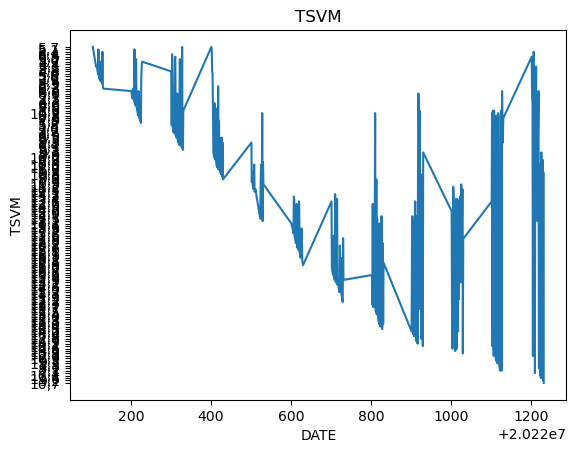

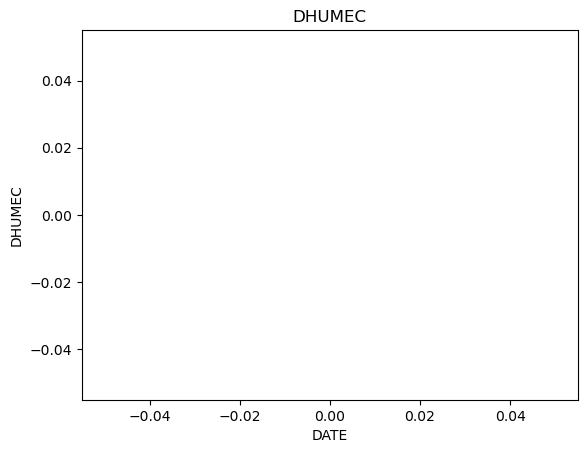

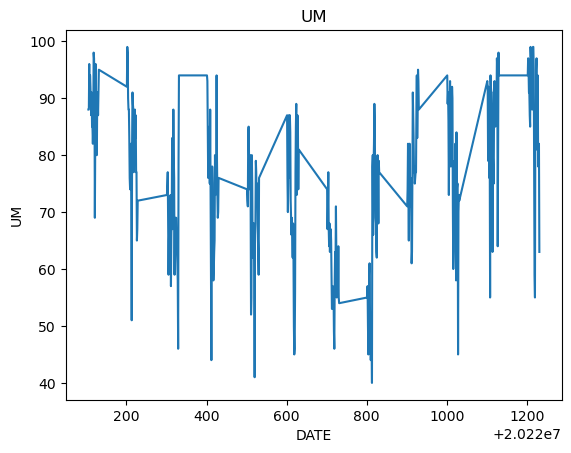

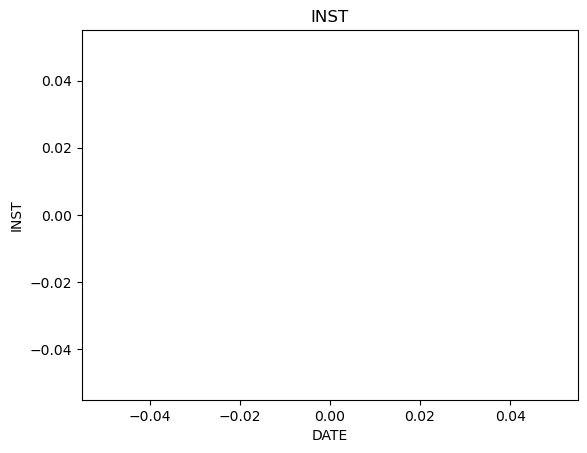

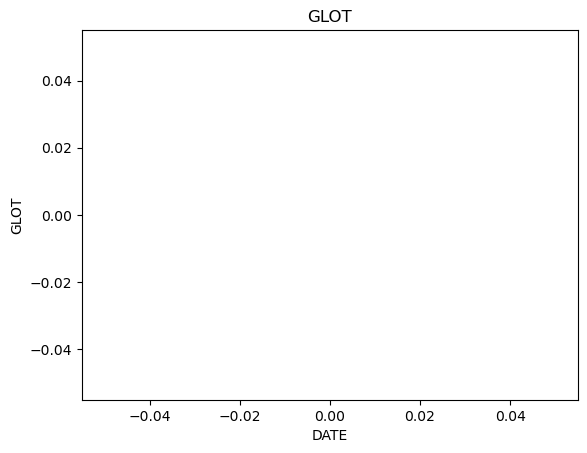

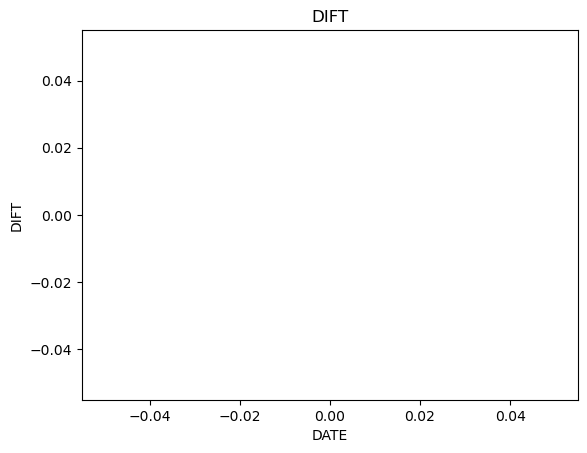

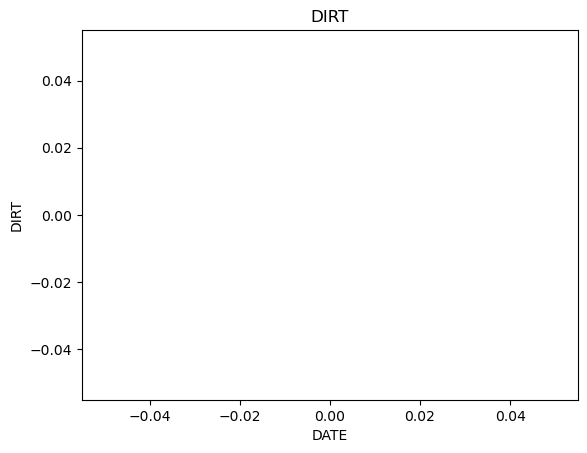

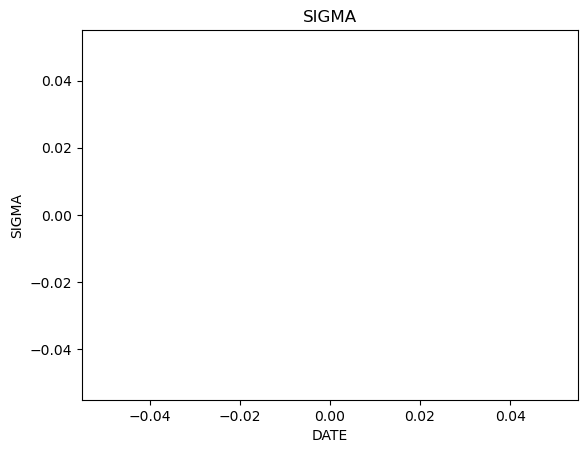

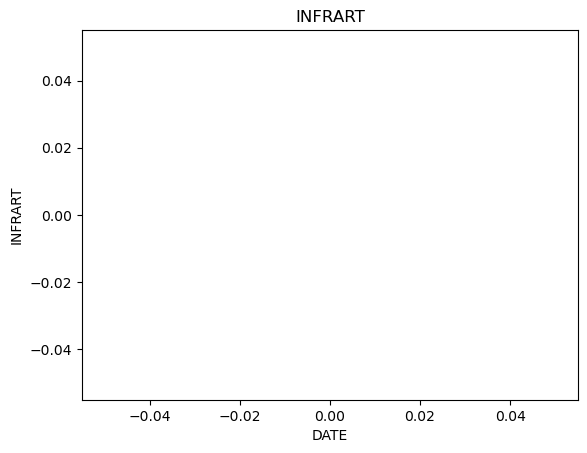

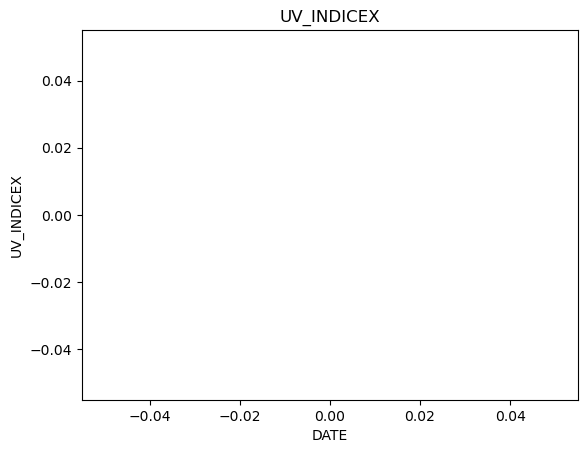

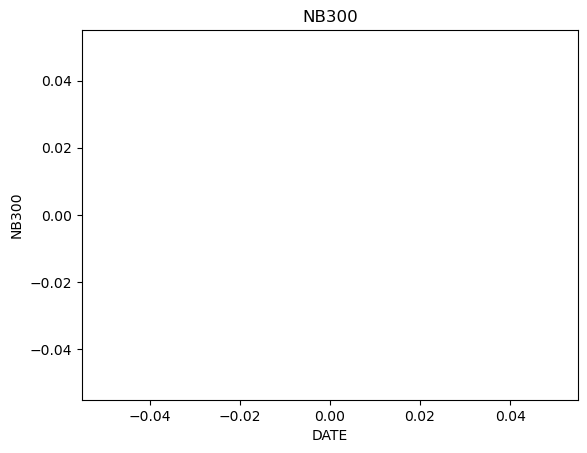

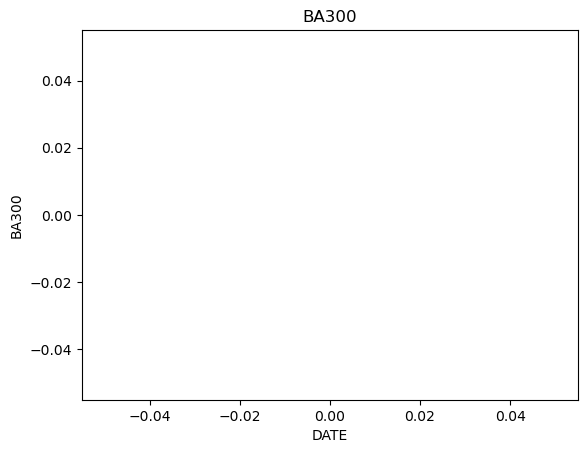

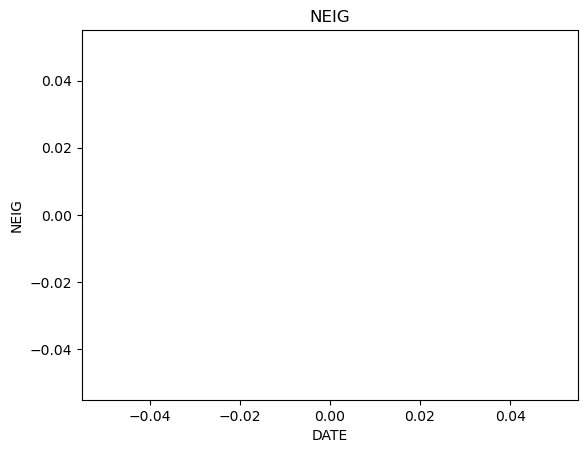

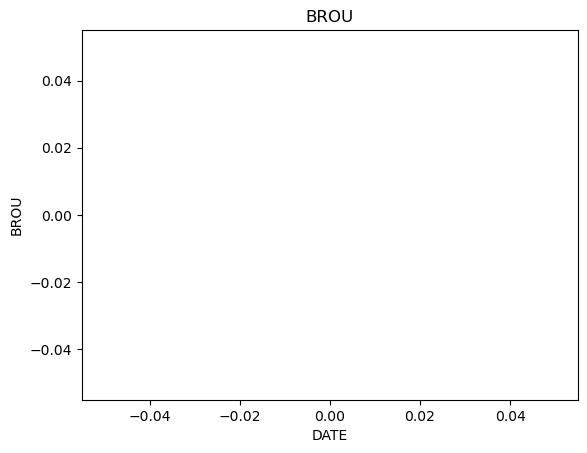

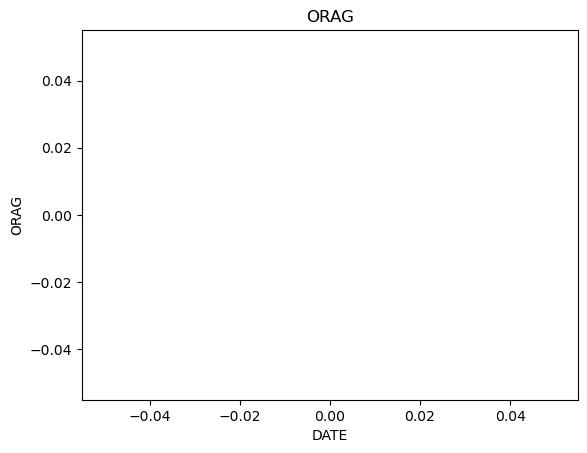

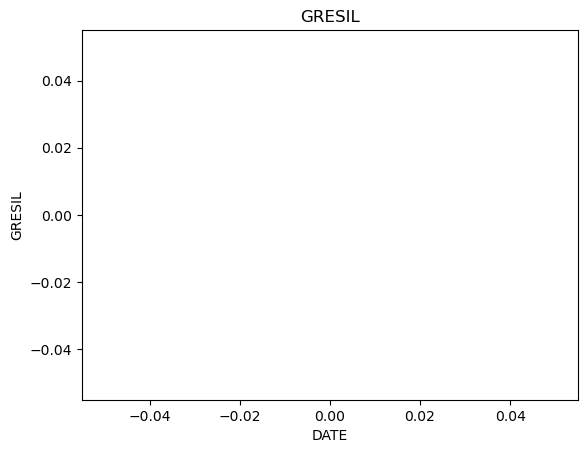

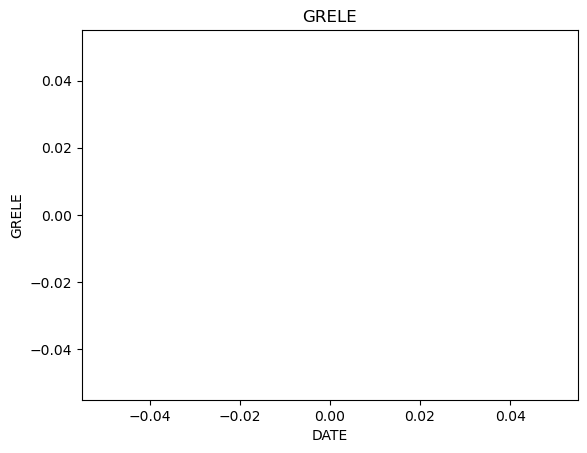

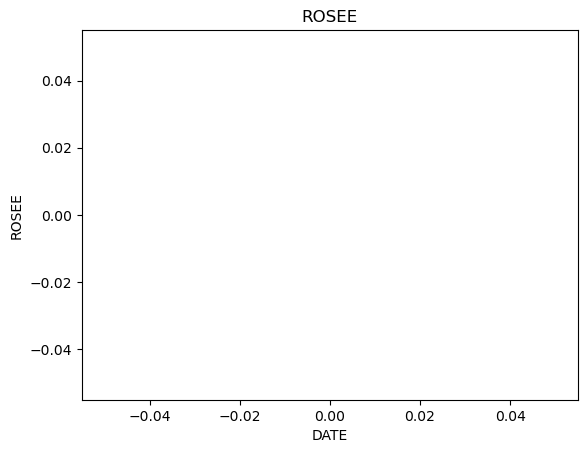

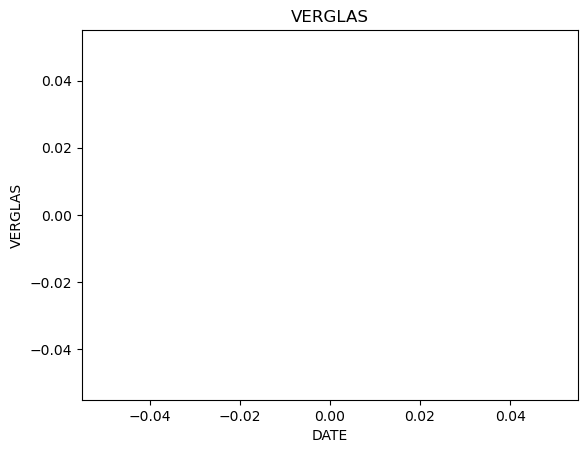

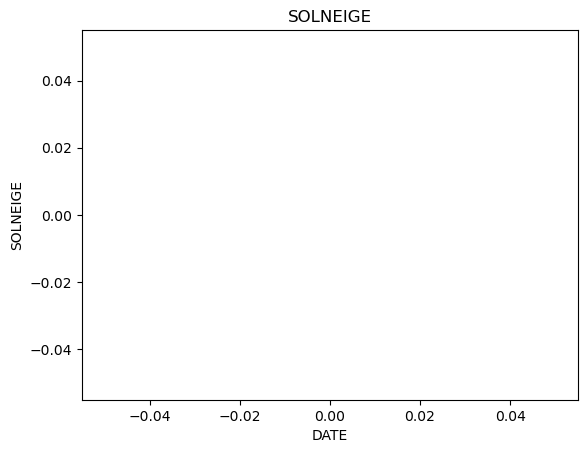

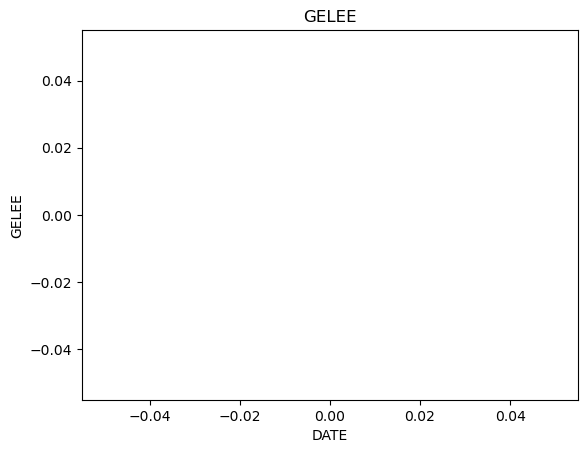

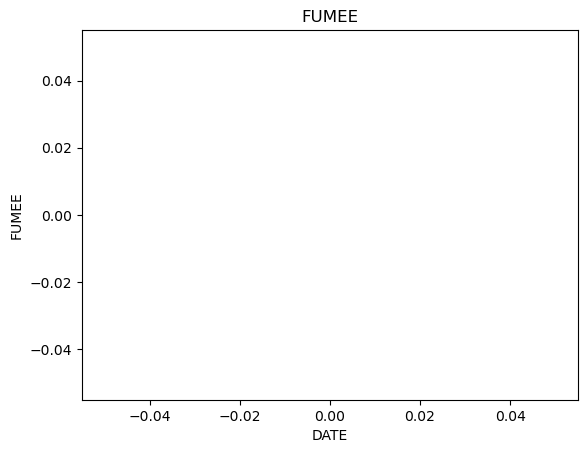

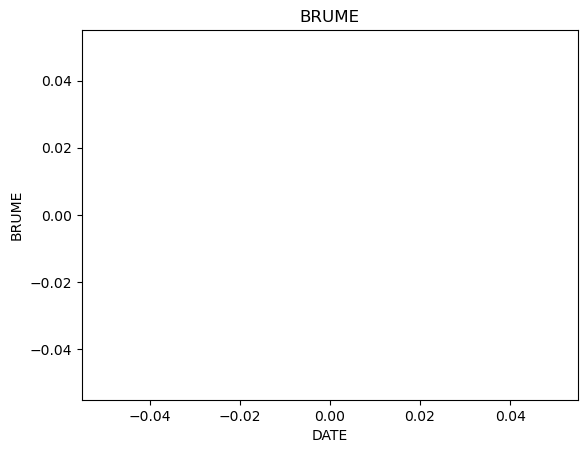

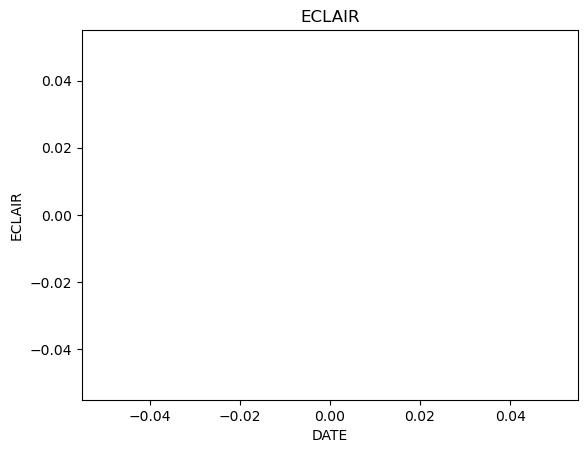

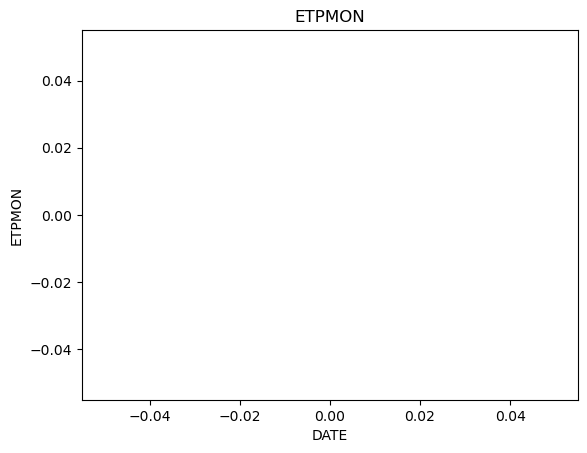

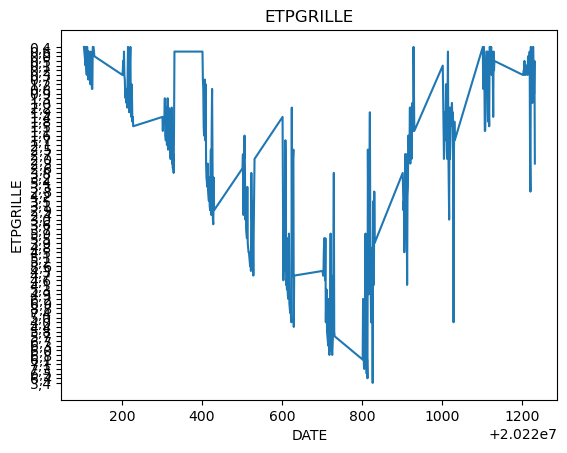

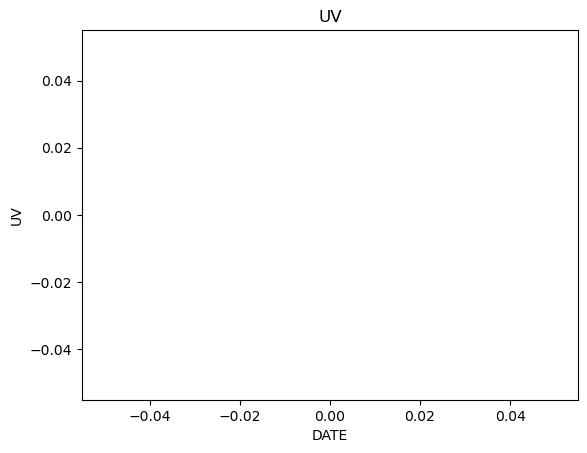

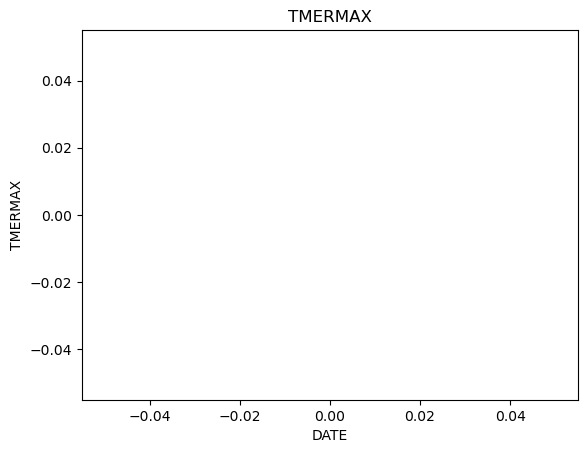

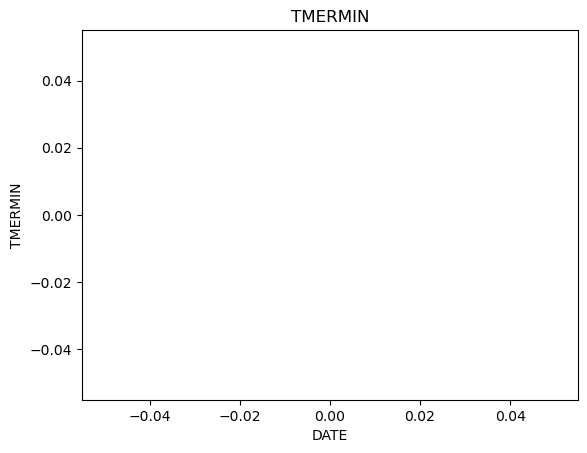

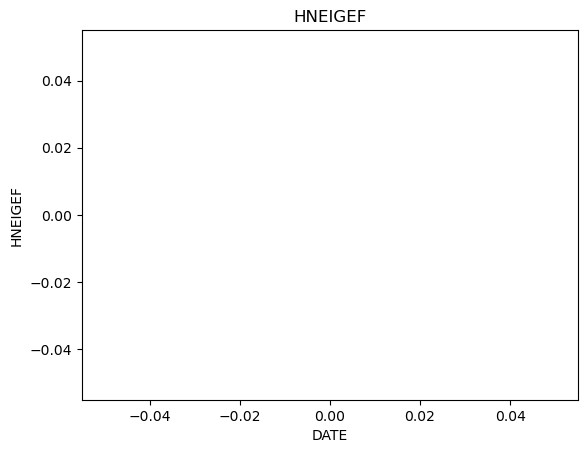

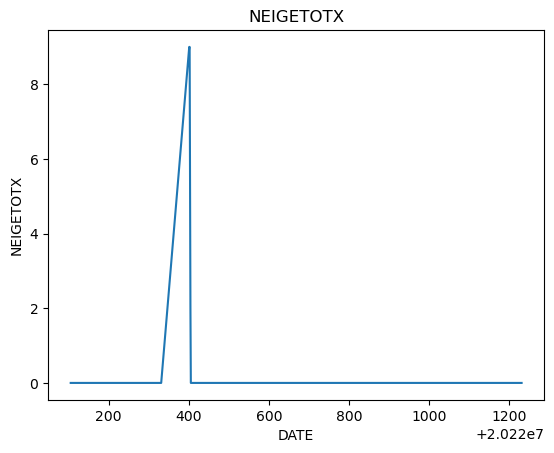

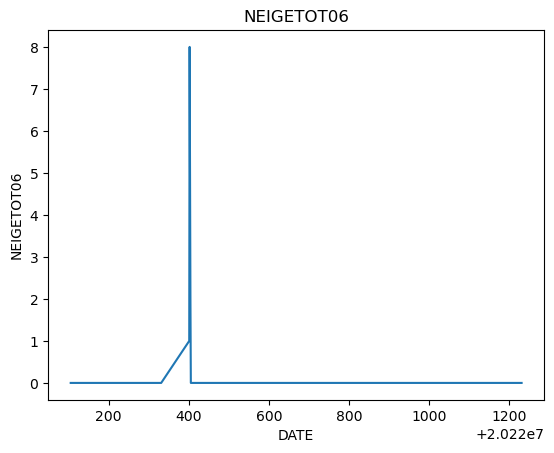

In [87]:

# Visualizing the behavior of all columns
columns = filtered_df.drop(columns=['DATE']).columns
for column in columns:
    f.sns.lineplot(x=filtered_df['DATE'], y=filtered_df[column])
    f.plt.title(column)
    f.plt.show()

In [25]:
# Function to convert our dataset in a time series dataset
def create_window(target, feature, window=1, offset=0):
    feature_new, target_new = [], []
    feature_np = feature.to_numpy()
    target_np = target.to_numpy()
    for i in range(window, target.shape[0] - offset):
        feature_list = feature_np[i - window:i]
        feature_new.append(feature_list.reshape(window, feature_np.shape[1]))
        target_new.append(target_np[i+offset].reshape(1))
    return np.array(feature_new), np.array(target_new)

In [57]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 80.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 95.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 53.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow import nn

2024-12-22 06:46:36.211319: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-22 06:46:36.213142: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-22 06:46:36.217958: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-22 06:46:36.230115: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734849996.250956   36752 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734849996.25